## Breast Cancer Cell Detection

You belong to the data team at a local research hospital. You've been tasked with developing a means to help doctors diagnose breast cancer. You've been given data about biopsied breast cells; where it is benign (not harmful) or malignant (cancerous).

1. What features of a cell are the largest drivers of malignancy?

2. How would a physician use your product?

3. There is a non-zero cost in time and money to collect each feature about a given cell. How would you go about determining the most cost-effective method of detecting malignancy?

The dataset contains the following features for each cell:

Sample code number: id number

Clump Thickness: 1 - 10

Uniformity of Cell Size: 1 - 10

Uniformity of Cell Shape: 1 - 10

Marginal Adhesion: 1 - 10

Single Epithelial Cell Size: 1 - 10

Bare Nuclei: 1 - 10

Bland Chromatin: 1 - 10

Normal Nucleoli: 1 - 10

Mitoses: 1 - 10

Class: (2 for benign, 4 for malignant)

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
sns.set(font_scale=1.5)
sns.set_style("whitegrid")
#sns.set_context("poster")
sns.set_style(rc={
    'axes.edgecolor': 'black',
    'axes.labelcolor': 'black',
    'xtick.bottom': True,
    'xtick.color': 'black',
    'ytick.left': True,
    'ytick.right': True,
    'ytick.color': 'black',
    'text.color': 'black',
    'text.size': '12',
    'axes.labelcolor': 'black',
    'font.sans-serif': ['DejaVu Sans',
        'Liberation Sans',
        'Bitstream Vera Sans',
        'sans-serif'],
})
sns.set_palette('Set2')

df = pd.read_csv("breast-cancer-wisconsin.csv", index_col=0)

In [2]:
df.head()

,ID,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
Index,,,,,,,,,,,
0,1241035,7,8,3,7,4,5,7,8,2,4
1,1107684,6,10,5,5,4,10,6,10,1,4
2,691628,8,6,4,10,10,1,3,5,1,4
3,1226612,7,5,6,3,3,8,7,4,1,4
4,1142706,5,10,10,10,6,10,6,5,2,4


There are large amount of duplicate data in this data set

In [5]:
df.ID.value_counts().head()

1198641    1003
1112209    1001
691628     1001
1107684    1001
1226612    1001
Name: ID, dtype: int64

In [6]:
df.loc[df.ID == df.ID[0]].head()

,ID,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
Index,,,,,,,,,,,
0,1241035,7,8,3,7,4,5,7,8,2,4
23,1241035,7,8,3,7,4,5,7,8,2,4
27,1241035,7,8,3,7,4,5,7,8,2,4
38,1241035,7,8,3,7,4,5,7,8,2,4
44,1241035,7,8,3,7,4,5,7,8,2,4


In [7]:
df.shape

(15855, 11)

In [8]:
df.drop_duplicates().shape

(754, 11)

In [9]:
df.drop_duplicates(inplace=True)

Some data in the columns are not numerical

In [14]:
df.Mitoses.value_counts()

1          569
2           35
3           32
10          31
?           12
4           12
No idea     10
7            9
#            9
8            8
5            6
20           4
6            3
70           1
Name: Mitoses, dtype: int64

In [12]:
df.dtypes

ID                              int64
Clump Thickness                 int64
Uniformity of Cell Size        object
Uniformity of Cell Shape       object
Marginal Adhesion              object
Single Epithelial Cell Size    object
Bare Nuclei                    object
Bland Chromatin                object
Normal Nucleoli                object
Mitoses                        object
Class                          object
dtype: object

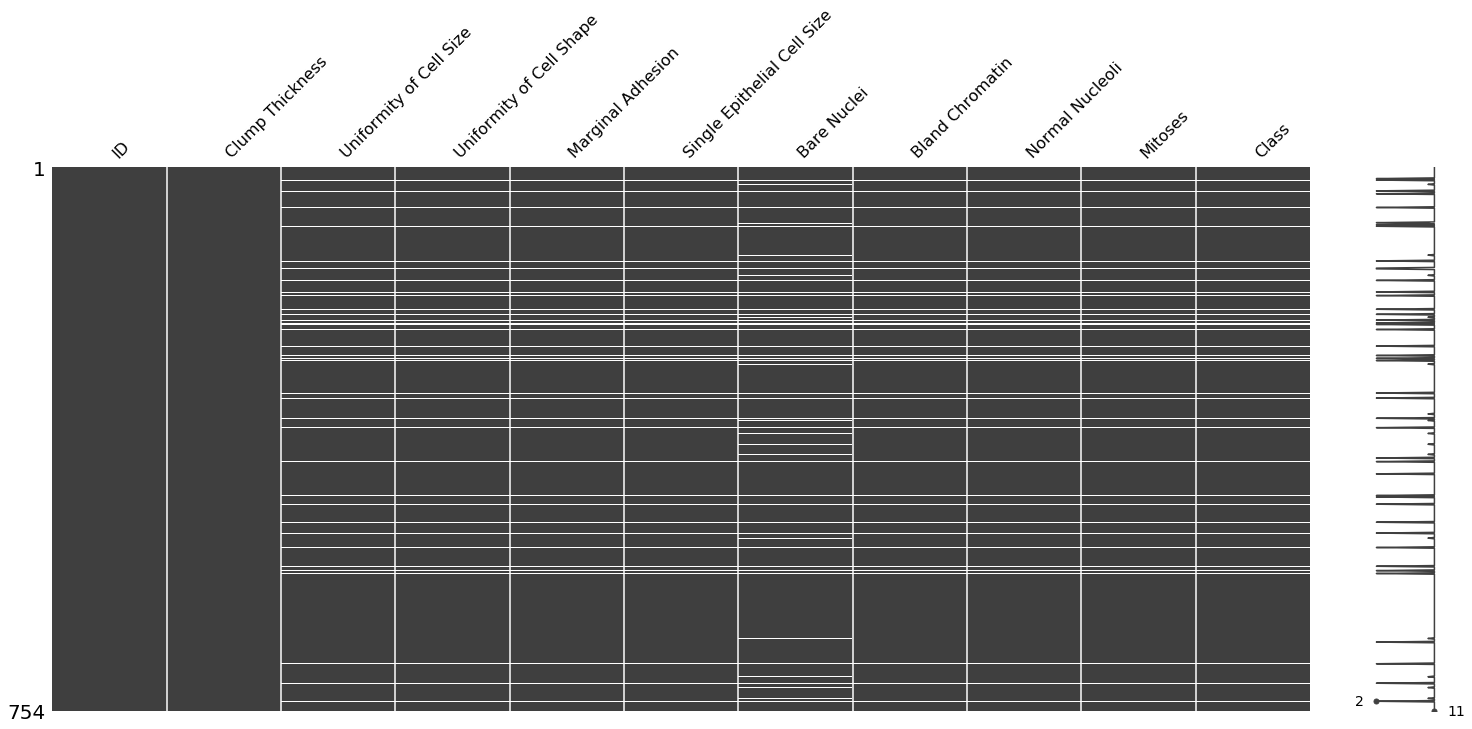

In [15]:
def is_int(s):
    """
    :param s: str
    :return: bool
    """
    try: 
        int(s)
        return s
    except:
        return np.nan
df_int = df.applymap(is_int)
msno.matrix(df_int)
plt.show()

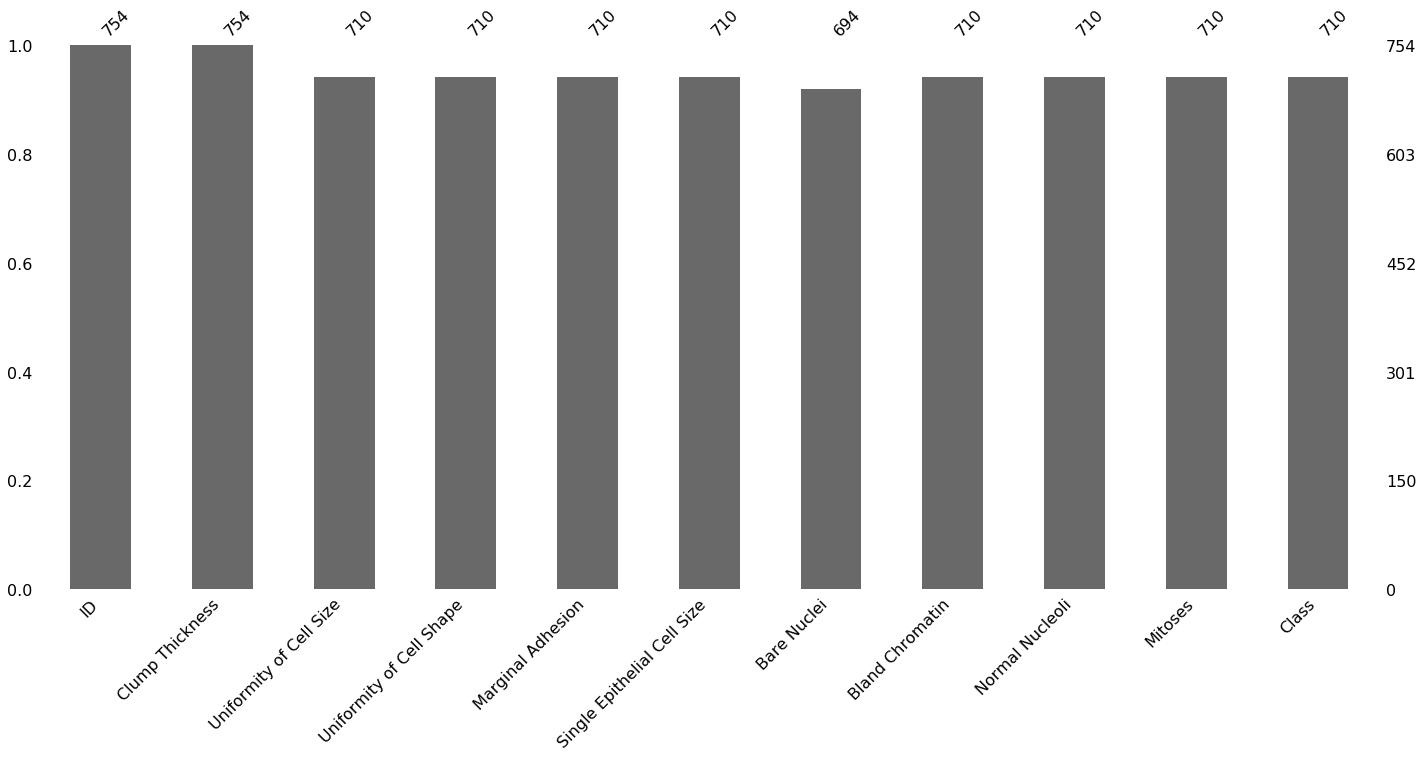

In [29]:
msno.bar(df_int)
plt.show()

# Data imputation

In [139]:
# Drop NaN values
df_all = df_int.loc[df_int.Class.notnull()]

## Wrong classes

Some data are 10 times over other data

In [140]:
df_all.Class.value_counts()

2     451
4     237
40     17
20      5
Name: Class, dtype: int64

In [141]:
df_all.loc[df.Class == '20']

,ID,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
Index,,,,,,,,,,,
2328,12124220,40,10,10,10,20,10,30,10,10,20
2944,12048980,60,10,10,10,20,10,30,10,10,20
12299,12760910,10,30,10,10,20,10,20,20,10,20
12350,12758070,40,20,40,30,20,20,20,10,10,20
14757,12270810,30,10,10,30,20,10,10,10,10,20


In [142]:
# Divide the magnitude of wrong classes by 10
df_all.loc[(df.Class == '20') | (df.Class == '40'), list(df_all.columns[2:])] = df_all.loc[(df.Class == '20') | (df.Class == '40')].\
            iloc[:, 2:].applymap(lambda x: str(int(x) // 10))

/home/tianyi/anaconda3/envs/insight/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [143]:
df_all.loc[(df.Class == '20') | (df.Class == '40')].head()

,ID,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
Index,,,,,,,,,,,
167,12266120,70,5,6,3,3,8,7,4,1,4
213,11122090,80,10,10,1,3,6,3,9,1,4
243,11690490,70,3,4,4,3,3,3,2,7,4
374,11986410,100,10,6,3,3,10,4,3,2,4
1191,12410350,70,8,3,7,4,5,7,8,2,4


In [144]:
df_all.shape

(710, 11)

In [145]:
# Now there might be some more duplicate information
df_all.drop_duplicates(inplace=True)
df_all.shape

/home/tianyi/anaconda3/envs/insight/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


(710, 11)

Impute missing data in the "Bare Nuclei" column using KNN

In [146]:
df_impute = df_all.iloc[:, 2:]
df_impute = df_impute.drop('Bare Nuclei', axis=1)
df_impute = df_impute.applymap(int)
df_impute.shape

(710, 8)

In [147]:
df_impute = df_impute.join(pd.get_dummies(df_all.ID, prefix='ID'))
df_impute_y = df_all.loc[:, 'Bare Nuclei']
df_impute_xtr = df_impute.loc[df_impute_y.notnull()]
df_impute_xte = df_impute.loc[df_impute_y.isnull()]
df_impute_ytr = df_impute_y.loc[df_impute_y.notnull()]

In [148]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)

In [149]:
knn.fit(df_impute_xtr, df_impute_ytr)
knn.score(df_impute_xtr, df_impute_ytr)

0.7939481268011528

In [150]:
df_impute_yte = knn.predict(df_impute_xte)
df_impute_y.loc[df_impute_y.isnull()] = df_impute_yte
df_imputed = df_impute.join(df_impute_y.apply(int))
df_imputed.shape

/home/tianyi/anaconda3/envs/insight/lib/python3.7/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/home/tianyi/anaconda3/envs/insight/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


(710, 674)

# Some visualization

In [152]:
for i in df_all.columns[1:]:
    df_all[i] = pd.to_numeric(df_all[i], errors='NaN')

/home/tianyi/anaconda3/envs/insight/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


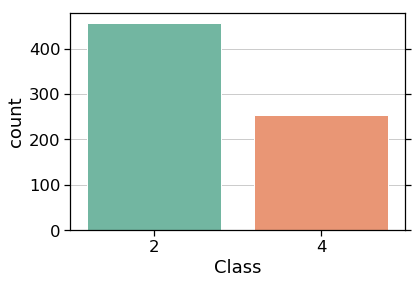

In [153]:
sns.countplot(df_all.Class)
plt.show()

In [154]:
df_all.shape

(710, 11)

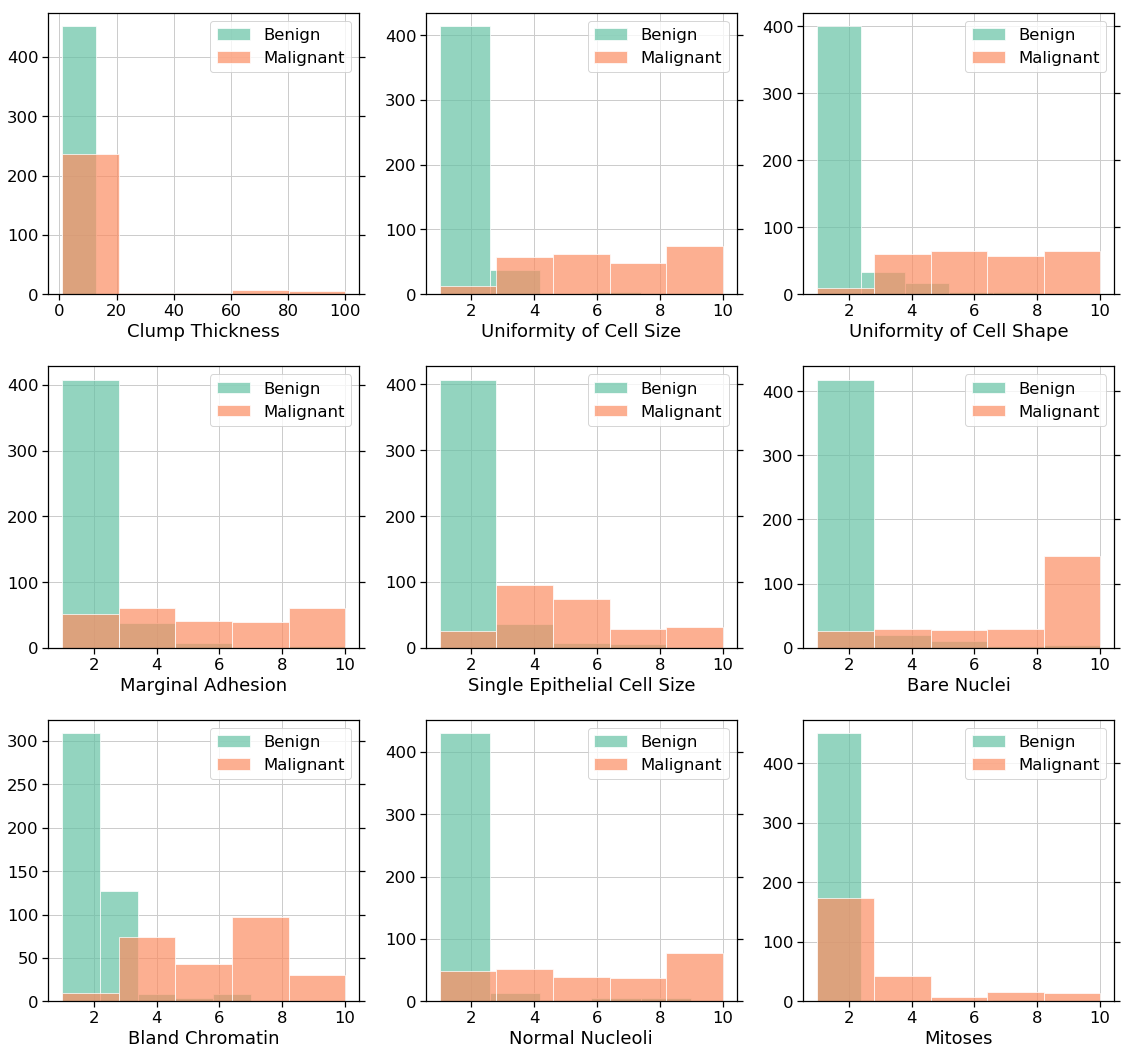

In [155]:
fig, ax = plt.subplots(3,3, figsize=(16,15))
for i, a in zip(df_all.columns[1:10], ax.ravel()):
    sns.distplot(df_all.loc[df_all.Class == 2, i], ax=a, hist=True, kde=False, bins=5, label='Benign', 
                 hist_kws={"alpha": 0.7})
    sns.distplot(df_all.loc[df_all.Class == 4, i], ax=a, hist=True, kde=False, bins=5, label='Malignant',
                 hist_kws={"alpha": 0.7})
    a.legend()
plt.tight_layout()

# Train Test split

In [156]:
from sklearn.model_selection import train_test_split

In [157]:
xtr, xte, ytr, yte = train_test_split(df_imputed, df_all.Class, test_size = 0.2, random_state = 42)

In [158]:
[xtr.shape[0], xte.shape[0]]

[568, 142]

In [159]:
ytr.value_counts()

2    360
4    208
Name: Class, dtype: int64

In [160]:
from sklearn.linear_model import LogisticRegression

In [161]:
lr = LogisticRegression()
lr.fit(xtr, ytr)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [162]:
lr.score(xtr, ytr)

0.9947183098591549

In [163]:
lr.score(xte, yte)

0.9859154929577465

In [169]:
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix

In [165]:
accuracy_score(yte, lr.predict(xte))

0.9859154929577465

In [168]:
f1_score(yte, lr.predict(xte), pos_label=4)

0.9787234042553191

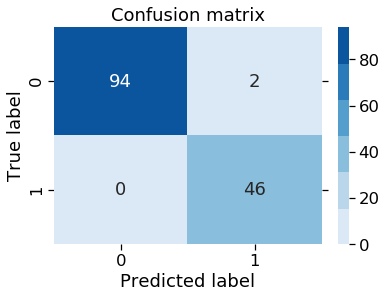

In [171]:
cm = confusion_matrix(yte, lr.predict(xte))

sns.heatmap(cm, annot=True, fmt="d", cmap=sns.color_palette("Blues"))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion matrix')
plt.show()